In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
#Load the dataframe - dataset1
import requests
import io
import pandas as pd

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)

# Convert the response content into a BytesIO stream
text1 = io.BytesIO(response.content)

# Read into a DataFrame
data = pd.read_csv(text1)

In [4]:
#Load the dataframe - dataset2
import requests
import io
import pandas as pd

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL2)

# Convert the response content into a BytesIO stream
text2 = io.BytesIO(response.content)

# Read into a DataFrame
X = pd.read_csv(text2)


In [5]:
#Task1
Y = data['Class'].to_numpy()

In [6]:
#Task2
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


In [7]:
#Task3
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
#Task4
parameters = {'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Best Parameters:", logreg_cv.best_params_)
print("Validation Accuracy:", logreg_cv.best_score_)


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.8464285714285713


Test Accuracy: 0.8333333333333334


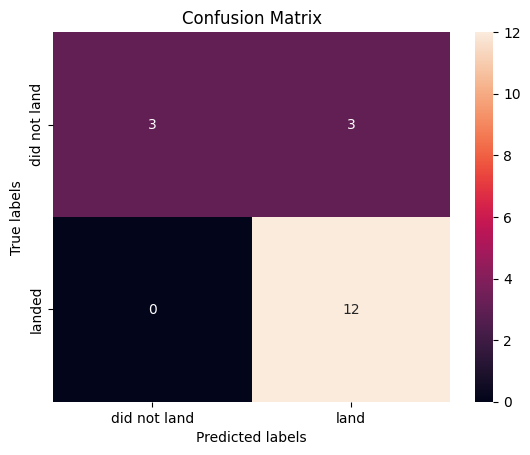

In [9]:
#Task5
print("Test Accuracy:", logreg_cv.score(X_test, Y_test))
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [10]:
#Task6
parameters = {'kernel':('linear','rbf','poly','sigmoid'),
              'C': np.logspace(-3,3,5),
              'gamma': np.logspace(-3,3,5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("Best Parameters:", svm_cv.best_params_)
print("Validation Accuracy:", svm_cv.best_score_)


Best Parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Validation Accuracy: 0.8482142857142856


Test Accuracy: 0.8333333333333334


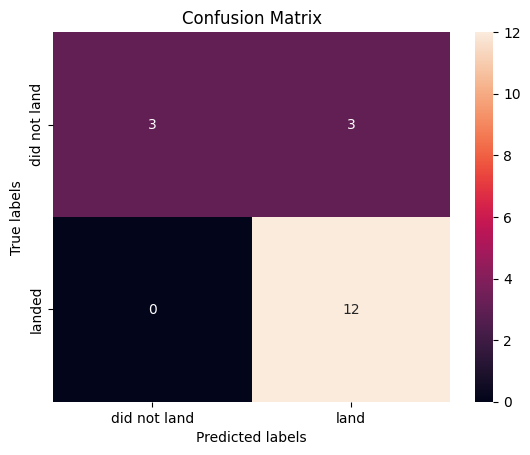

In [11]:
#Task7
print("Test Accuracy:", svm_cv.score(X_test, Y_test))
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [12]:
#Task8
parameters = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[2*n for n in range(1,10)],
              'max_features':['sqrt'],
              'min_samples_leaf':[1,2,4],
              'min_samples_split':[2,5,10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("Best Parameters:", tree_cv.best_params_)
print("Validation Accuracy:", tree_cv.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Validation Accuracy: 0.8625


Test Accuracy: 0.6666666666666666


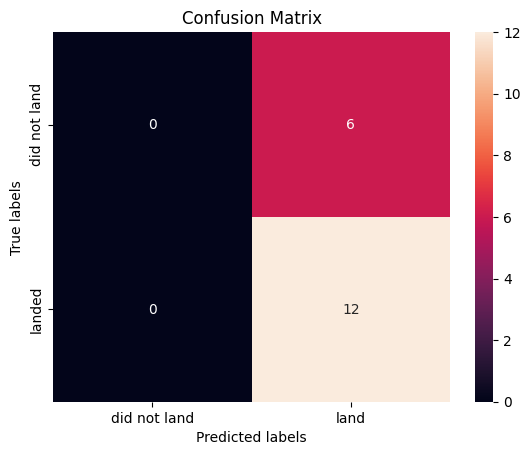

In [13]:
#Task9
print("Test Accuracy:", tree_cv.score(X_test, Y_test))
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [14]:
#Task10
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'p':[1,2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("Best Parameters:", knn_cv.best_params_)
print("Validation Accuracy:", knn_cv.best_score_)


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Validation Accuracy: 0.8482142857142858


Test Accuracy: 0.8333333333333334


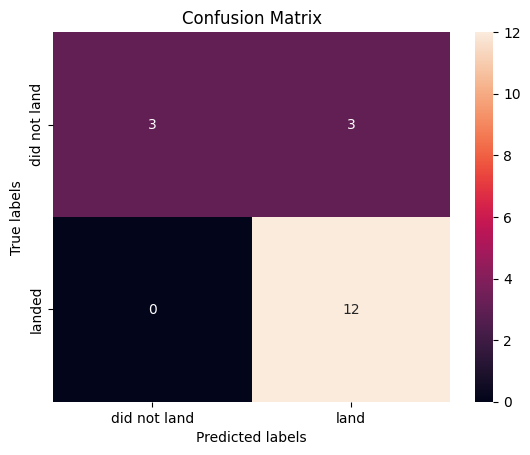

In [15]:
#Task11
print("Test Accuracy:", knn_cv.score(X_test, Y_test))
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


Best Model: Logistic Regression


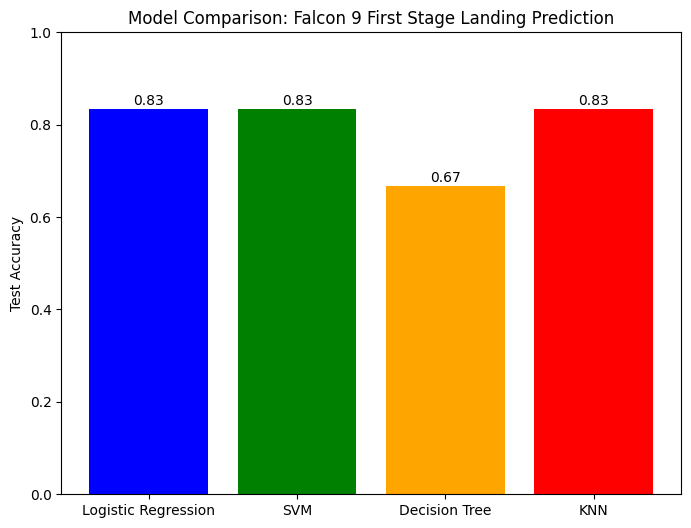

In [16]:
#Task12 test accuracy
accuracies = {
    'Logistic Regression': logreg_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}

best_model = max(accuracies, key=accuracies.get)
print("Best Model:", best_model)

# Visualization
plt.figure(figsize=(8,6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue','green','orange','red'])
plt.ylabel('Test Accuracy')
plt.title('Model Comparison: Falcon 9 First Stage Landing Prediction')
plt.ylim(0,1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center')
plt.show()


In [17]:
# Train accuracy for each model
train_accuracies = {
    'Logistic Regression': logreg_cv.score(X_train, Y_train),
    'SVM': svm_cv.score(X_train, Y_train),
    'Decision Tree': tree_cv.score(X_train, Y_train),
    'KNN': knn_cv.score(X_train, Y_train)
}

# Print results
for model, acc in train_accuracies.items():
    print(f"{model} Train Accuracy: {acc:.2f}")


Logistic Regression Train Accuracy: 0.88
SVM Train Accuracy: 0.89
Decision Tree Train Accuracy: 0.74
KNN Train Accuracy: 0.86


In [18]:
#Best model
best_model = max(accuracies, key=accuracies.get)
print("Best Model:", best_model)

Best Model: Logistic Regression


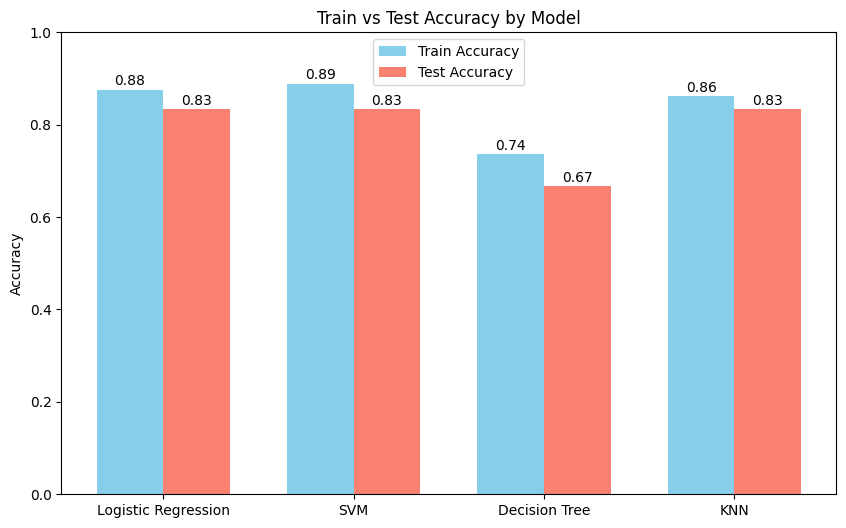

In [19]:
#Optional: Visualize Train vs Test Accuracy
#To compare train and test accuracy side-by-side:
test_accuracies = {
    'Logistic Regression': logreg_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}

models = list(train_accuracies.keys())
train_values = list(train_accuracies.values())
test_values = list(test_accuracies.values())

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_values, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_values, width, label='Test Accuracy', color='salmon')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy by Model')
plt.legend()
for i in range(len(models)):
    plt.text(x[i] - width/2, train_values[i] + 0.01, f"{train_values[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, test_values[i] + 0.01, f"{test_values[i]:.2f}", ha='center')
plt.show()
